Access an open data repository and find some historical weather data for the part of the world that you are in. Import the data to a DataFrame. Then calculate the:

- mean max temperature
- mean wind speed
- mean humidity.

For a challenge, compute the Pearson correlation coefficient between the temperature and wind speed. Is it significant?

For the second part of the exercise, your job is to impose some meaning on this dataset. 

Thinking about the techniques you learned already can you create a data processing pipeline that involves all steps involved in importing, manipulating and exploring data at depth?

Hint: we really want you to focus on exploring the dataset as that is where you will pick up lots of marks in your coursework! 

You might want to try flexing some of your statistical muscles for this one! 

Chapter 4.3 Python for Data Analysis Data Wrangling with Pandas, NumPy, and IPython By Wes McKinney would be a good place to start – but Python has loads of statistical libraries!

**Links**
- [how-to-use-correlation-to-understand-the-relationship-between-variables/](https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/)
-[scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
-[likegeeks python correlation matrix](https://likegeeks.com/python-correlation-matrix/)
- [normaltest](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)
- [shapiro wilk test](https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/)



[Data Source: https://edmonton.weatherstats.ca/download.html](https://edmonton.weatherstats.ca/download.html)

In [35]:
import pandas as pd
import numpy as np

data_cols_import = ['date', 'max_temperature', 'min_temperature', 'avg_relative_humidity', 'avg_wind_speed']

data = pd.read_csv('Data/weatherstats_edmonton_daily.csv', usecols=data_cols_import)
data = data.sort_values(by='date')
print('DATA SHAPE:', data.shape)
data.head()



DATA SHAPE: (1000, 5)


,date,max_temperature,min_temperature,avg_relative_humidity,avg_wind_speed
999,2018-08-02,23.9,12.3,67.0,13.5
998,2018-08-03,21.0,14.6,72.5,16.5
997,2018-08-04,21.0,15.5,76.5,11.5
996,2018-08-05,25.8,11.3,64.0,7.5
995,2018-08-06,29.4,13.4,53.0,16.0


#### Get Basic Stats

In [25]:
data.describe()

,max_temperature,min_temperature,avg_relative_humidity,avg_hourly_wind_speed,avg_wind_speed
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.102000,-2.121100,66.759000,10.874040,11.470000
std,12.190526,11.147326,12.016356,3.879111,3.901259
min,-29.700000,-37.600000,29.000000,2.920000,3.000000
25%,-0.025000,-9.800000,60.000000,8.030000,8.500000
50%,8.150000,-1.700000,67.500000,10.460000,11.000000
75%,18.500000,7.500000,75.000000,13.120000,14.000000
max,34.500000,18.900000,95.000000,30.880000,27.000000


**Mean Max Temperature:** 8.1 C

**Mean Daily Average Wind Speed:** 11.5 km/h

**Mean Avg Relative Humidity:** 66.8  


### Visually inspect data with scatterplots

First I took a quick look at scatter plots of the data to see if any relationships might be visible from that.

Looking at the data the only plot showing signs of a relationship is max temp and humidity and that they are negatively correlated. As max temperature increases can see humidity decreases and vice versa. 





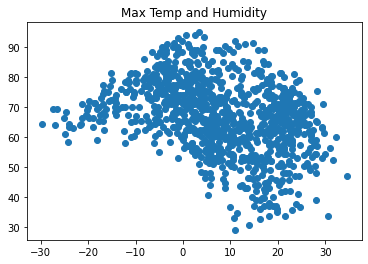

<Figure size 144x216 with 0 Axes>

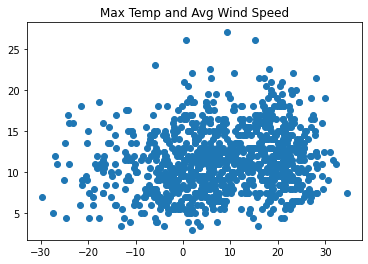

<Figure size 144x216 with 0 Axes>

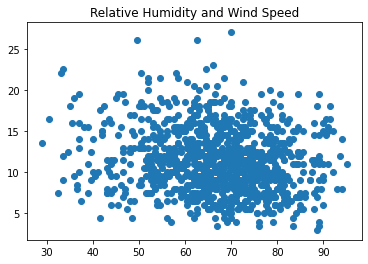

<Figure size 144x216 with 0 Axes>

In [103]:
from matplotlib import pyplot

def build_pyplot(var1, var2, title):
    pyplot.scatter(var1, var2)
    pyplot.title(title)
    pyplot.figure(figsize=(2,3))
    pyplot.show()

build_pyplot(data['max_temperature'], data['avg_relative_humidity'], 'Max Temp and Humidity')
build_pyplot(data['max_temperature'], data['avg_wind_speed'], 'Max Temp and Avg Wind Speed')
build_pyplot(data['avg_relative_humidity'], data['avg_wind_speed'], 'Relative Humidity and Wind Speed')

### Check for normal distribution of data

Pearson correlation requires that each dataset be normally distributed.



In [57]:
from scipy.stats import normaltest
from scipy.stats import shapiro


def test_normal_dist(var, name):
    result = normaltest(var)
    if result.pvalue < 1e-3:
        print(name, 'NOT normal distribution')
    else:
        print(name, 'Normal distribution')
        
        
print('Results of normal tests: \n' )
test_normal_dist(data['max_temperature'], 'Max Temp')
test_normal_dist(data['avg_relative_humidity'], 'Avg Humidity')
test_normal_dist(data['avg_wind_speed'], 'Avg Wind')
        
def test_normal_dist_shapiro(var, name):
    stat, p = shapiro(var)
    if p > 0.05:
        print(name, 'Normally distributed')
    else:
        print(name, 'NOT normally distribution')
print('\n Results of shapiro tests: \n')
test_normal_dist_shapiro(data['max_temperature'], 'Max Temp')
test_normal_dist_shapiro(data['avg_relative_humidity'], 'Avg Humidity')
test_normal_dist_shapiro(data['avg_wind_speed'], 'Avg Wind')


Results of normal test: 

Max Temp NOT normal distribution
Avg Humidity NOT normal distribution
Avg Wind NOT normal distribution

 Results of shapiro test: 

Max Temp NOT normally distribution
Avg Humidity NOT normally distribution
Avg Wind NOT normally distribution


After testing for normal distribution in these datasets, none of them can be seen to have a normal distribution which could make sense for weather data as it follows seasons over the year and is cyclical in nature. 

This being the case the pearson correlation coefficient is not a good test as it relies on normally distributed datasets.
I still plotted out the pearson correlation corefficient to see the results and for practice. 

The Spearman rank-order correlation coefficient does not assume normal distribution so I calculated that to see if there was any correlation. 

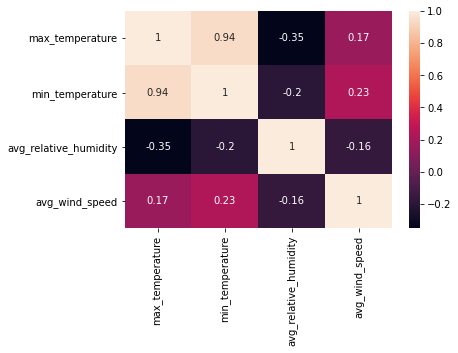

max_temperature & avg_wind_speed Pearson:  0.1689942985646744 p-value:  7.611777386510121e-08
max_temperature & avg_relative_humidity Pearson:  -0.3857945170410158 p-value:  7.75732762126633e-37
max_temperature & avg_wind_speed Pearson:  -0.15714968208536279 p-value:  5.903220431620353e-07


In [106]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns

#build heatmat plat of correlations
def build_heat_map(data):
    corr_mat=data.corr()
    sns.heatmap(corr_mat, annot=True)
    pyplot.show()

build_heat_map(data)

def get_spearmanr(data, col_titles):
    title_string1 = col_titles[0] + ' & ' + col_titles[1] + ' Pearson: '
    title_string2 = col_titles[0] + ' & ' + col_titles[2] + ' Pearson: '
    title_string3 = col_titles[1] + ' & ' + col_titles[2] + ' Pearson: '
    spr1, p1 = spearmanr(data[col_titles[0]], data[col_titles[1]])
    spr2, p2 = spearmanr(data[col_titles[0]], data[col_titles[2]])
    spr3, p3 = spearmanr(data[col_titles[1]], data[col_titles[2]])
    print(title_string1, spr1, 'p-value: ', p1)
    print(title_string2, spr2, 'p-value: ', p2)
    print(title_string1, spr3, 'p-value: ', p3)
    
col_names=['max_temperature', 'avg_wind_speed', 'avg_relative_humidity']
get_spearmanr(data, col_names)

Spearman Test p-values are all very small so we can assume these correlation values are correct.  

Getting the correlation coefficient matrix, can see the preliminary findings from the visual analysis match the matrix findings.

The largest absolute correlation is between max temperature and average humidity. The pearson correlation coefficient is -0.35 in this case compared to 0.17 and -0.16 between the other variables being compared. The coefficient for max temperature and windspeed is very small at 0.17 so very weak correlation if any at all. 

This is still a somewhat weak correlation as it is between -0.5 and 0.5. 

I left minimum tempreature in the data when calculating the matirx to see how it compared to max value and it has a lower pearson correlation coefficient(-0.2) than max temperature when compared to humidity.


### Further analysis
Looking at the data I thought maybe there mighte a  stronger correlation between humidity and max temperature excluding temperatures that were colder. I filtered out the data to create two new datasets for temps above 0 and temps above -10 C to further analyze thet data. I found that the strongest spearman correlation (data was still not normally distributed except for humidity above 0) was:

Max Temperature & Avg. Relative Humidity Pearson: -0.40012519301034283 p-value:  1.2954551649821185e-36

So there is a moderate negative correlation between max temperature and humidity in edmonton when the max temperature is above -10 C. 


In [104]:
### remove days with temps below 0 - based on scatterplot seems more correlation outside of that

is_above_0 = data['max_temperature'] > 0
is_above_negative_10 = data['max_temperature'] > -10

data_above_0 = data[is_above_0]
data_above_neg_10 = data[is_above_negative_10]


Max Temp NOT normal distribution
Avg Humidity Normal distribution
Avg Wind NOT normal distribution
Max Temp NOT normal distribution
Avg Humidity NOT normal distribution
Avg Wind NOT normal distribution


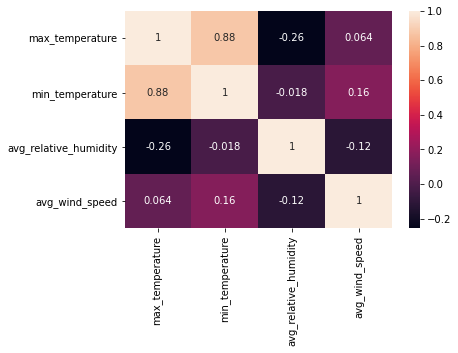

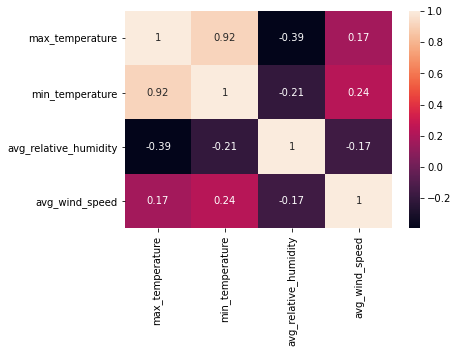

Spearman results for temps above 0 C
max_temperature & avg_wind_speed Pearson:  0.06380085815102746 p-value:  0.0818109719861871
max_temperature & avg_relative_humidity Pearson:  -0.23589932656621532 p-value:  7.020190681512027e-11
max_temperature & avg_wind_speed Pearson:  -0.11039468883682833 p-value:  0.0025499011001191138

Spearman results for temps above -10 C
max_temperature & avg_wind_speed Pearson:  0.16768648665111405 p-value:  3.222392008940711e-07
max_temperature & avg_relative_humidity Pearson:  -0.40012519301034283 p-value:  1.2954551649821185e-36
max_temperature & avg_wind_speed Pearson:  -0.16226577318812674 p-value:  7.712554259434919e-07


In [105]:
test_normal_dist(data_above_0['max_temperature'], 'Max Temp')
test_normal_dist(data_above_0['avg_relative_humidity'], 'Avg Humidity')
test_normal_dist(data_above_0['avg_wind_speed'], 'Avg Wind')

test_normal_dist(data_above_neg_10['max_temperature'], 'Max Temp')
test_normal_dist(data_above_neg_10['avg_relative_humidity'], 'Avg Humidity')
test_normal_dist(data_above_neg_10['avg_wind_speed'], 'Avg Wind')

# build_pyplot(data_above_0['max_temperature'], data_above_0['avg_relative_humidity'], 'Max Temp and Humidity (> 0C)')

build_heat_map(data_above_0)

# build_pyplot(data_above_neg_10['max_temperature'], data_above_neg_10['avg_relative_humidity'], 'Max Temp and Humidity (> 0C)')

build_heat_map(data_above_neg_10)

print('Spearman results for temps above 0 C')
get_spearmanr(data_above_0, col_names)

print('\nSpearman results for temps above -10 C')
get_spearmanr(data_above_neg_10, col_names)